In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing Dataframes of ETF_prices and converting to returns Dataframe
ETF_data = pd.read_excel(r'./ETF_Prices.xlsx',index_col='Date')
ETF_data.index.name = 'DATE'
ETF_data.index = pd.to_datetime(ETF_data.index)
ETF_data = ETF_data.groupby(ETF_data.index.to_period('M')).first()
ETF_data_returns = ETF_data.pct_change()[1:]
ETF_data_returns.index = ETF_data_returns.index.to_timestamp()

In [3]:
# Importing Dataframes of alpha signals
df_ridge_alpha = pd.read_excel('df_all_alpha_Ridge_Regression_signal.xlsx', index_col=0)
df_lasso_alpha = pd.read_excel('df_all_alpha_Lasso_Regression_signal.xlsx', index_col=0)
df_linear_alpha = pd.read_excel('df_all_alpha_Linear_Regression_signal.xlsx', index_col=0)

# Rename index column to 'DATE'
df_ridge_alpha.index.name = 'DATE'
df_lasso_alpha.index.name = 'DATE'
df_linear_alpha.index.name = 'DATE'

In [4]:
def backtesting_signal(df_etf_return,df_alpha_signal,strategy_id):

    backtest_return_list = []
    df_backtesting = pd.merge(df_etf_return,df_alpha_signal,left_index=True,right_index=True)[1:]

    for i in range(df_backtesting.shape[0]):

        long_tickers = df_backtesting[df_alpha_signal.columns.to_list()].iloc[i].reset_index(name='ticker')['ticker'].to_list()
        long_returns = df_backtesting[long_tickers].iloc[i].reset_index(name='returns')['returns'].values

        index = df_backtesting.index[i]
        portfolio_return = np.mean(long_returns)
        backtest_return_list.append(portfolio_return)

    df_backtesting[str(strategy_id)] = backtest_return_list
    df_backtesting = df_backtesting.drop(df_alpha_signal.columns,axis=1)
    
    return df_backtesting

df_backtesting_result = backtesting_signal(ETF_data_returns,df_ridge_alpha,strategy_id='Ridge Alpha Strategy Return')
df_backtesting_result = backtesting_signal(df_backtesting_result,df_lasso_alpha,strategy_id='Lasso Alpha Strategy Return')
df_backtesting_result = backtesting_signal(df_backtesting_result,df_linear_alpha,strategy_id='Linear Alpha Strategy Return')
df_backtesting_result 

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,Ridge Alpha Strategy Return,Lasso Alpha Strategy Return,Linear Alpha Strategy Return
DATE,,,,,,,,,,,,
2005-04-01,-0.034051,0.021628,-0.065421,-0.016639,-0.039624,-0.030200,0.004119,-0.025354,-0.031783,-0.014078,-0.027407,-0.025014
2005-05-01,-0.060858,-0.060323,0.018214,-0.021898,-0.027849,0.006579,0.030085,0.048311,-0.051368,-0.008480,-0.038584,-0.015440
2005-06-01,0.000354,0.028828,0.035075,0.029851,0.081167,0.022658,0.009625,0.010957,0.060878,0.025845,0.031284,0.037701
2005-07-01,-0.040000,0.069932,-0.000339,-0.028986,-0.020118,-0.027269,0.047009,-0.012114,-0.007551,0.021904,0.005511,0.002179
2005-08-01,0.050885,0.058539,0.014576,0.033921,0.054582,0.023215,0.000000,0.029042,0.054474,0.026759,0.044618,0.044021
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.025968,0.070182,0.042183,0.031768,0.029742,0.007893,0.004854,0.013750,-0.000524,0.006493,0.018684,0.006493
2023-09-01,-0.017811,0.042150,-0.018115,-0.017607,-0.013714,-0.042474,-0.054491,0.000899,-0.012226,-0.027073,-0.000349,-0.027073
2023-10-01,-0.075280,-0.023694,-0.051888,-0.077298,-0.059648,-0.052675,-0.102969,-0.037508,-0.050451,-0.060901,-0.052268,-0.060901


In [5]:
df_price_benchmark = yf.download("SPY", start= '2000-01-01', end = '2024-01-01', interval='1mo').dropna()
df_return_benchmark = df_price_benchmark[['Close']].reset_index()
df_return_benchmark.columns = ['DATE','Benchmark Price']
df_return_benchmark.index = df_return_benchmark['DATE']
df_return_benchmark = df_return_benchmark.drop(['DATE'],axis=1)
df_return_benchmark['Benchmark Return'] = df_return_benchmark['Benchmark Price'].pct_change()
df_return_benchmark.drop(columns='Benchmark Price', inplace=True)
df_return_benchmark

[*********************100%%**********************]  1 of 1 completed


,Benchmark Return
DATE,
2000-01-01,NaN
2000-02-01,-0.015226
2000-03-01,0.094134
2000-04-01,-0.035121
2000-05-01,-0.015723
...,...
2023-08-01,-0.016252
2023-09-01,-0.050783
2023-10-01,-0.021709


In [6]:
df_backtesting_result['All ETFs Equal Weighted Return'] = df_backtesting_result[ETF_data.columns].mean(axis=1)
df_backtesting = pd.merge(df_backtesting_result,df_return_benchmark,left_index=True,right_index=True)
df_backtesting

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,Ridge Alpha Strategy Return,Lasso Alpha Strategy Return,Linear Alpha Strategy Return,All ETFs Equal Weighted Return,Benchmark Return
DATE,,,,,,,,,,,,,,
2005-04-01,-0.034051,0.021628,-0.065421,-0.016639,-0.039624,-0.030200,0.004119,-0.025354,-0.031783,-0.014078,-0.027407,-0.025014,-0.024147,-0.018735
2005-05-01,-0.060858,-0.060323,0.018214,-0.021898,-0.027849,0.006579,0.030085,0.048311,-0.051368,-0.008480,-0.038584,-0.015440,-0.013234,0.032225
2005-06-01,0.000354,0.028828,0.035075,0.029851,0.081167,0.022658,0.009625,0.010957,0.060878,0.025845,0.031284,0.037701,0.031044,-0.002511
2005-07-01,-0.040000,0.069932,-0.000339,-0.028986,-0.020118,-0.027269,0.047009,-0.012114,-0.007551,0.021904,0.005511,0.002179,-0.002159,0.038261
2005-08-01,0.050885,0.058539,0.014576,0.033921,0.054582,0.023215,0.000000,0.029042,0.054474,0.026759,0.044618,0.044021,0.035470,-0.009374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.025968,0.070182,0.042183,0.031768,0.029742,0.007893,0.004854,0.013750,-0.000524,0.006493,0.018684,0.006493,0.025091,-0.016252
2023-09-01,-0.017811,0.042150,-0.018115,-0.017607,-0.013714,-0.042474,-0.054491,0.000899,-0.012226,-0.027073,-0.000349,-0.027073,-0.014821,-0.050783
2023-10-01,-0.075280,-0.023694,-0.051888,-0.077298,-0.059648,-0.052675,-0.102969,-0.037508,-0.050451,-0.060901,-0.052268,-0.060901,-0.059046,-0.021709


C:\Users\Sergi Garcia Marsol\AppData\Local\Temp\ipykernel_4176\3711344242.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=3, colspan=1)


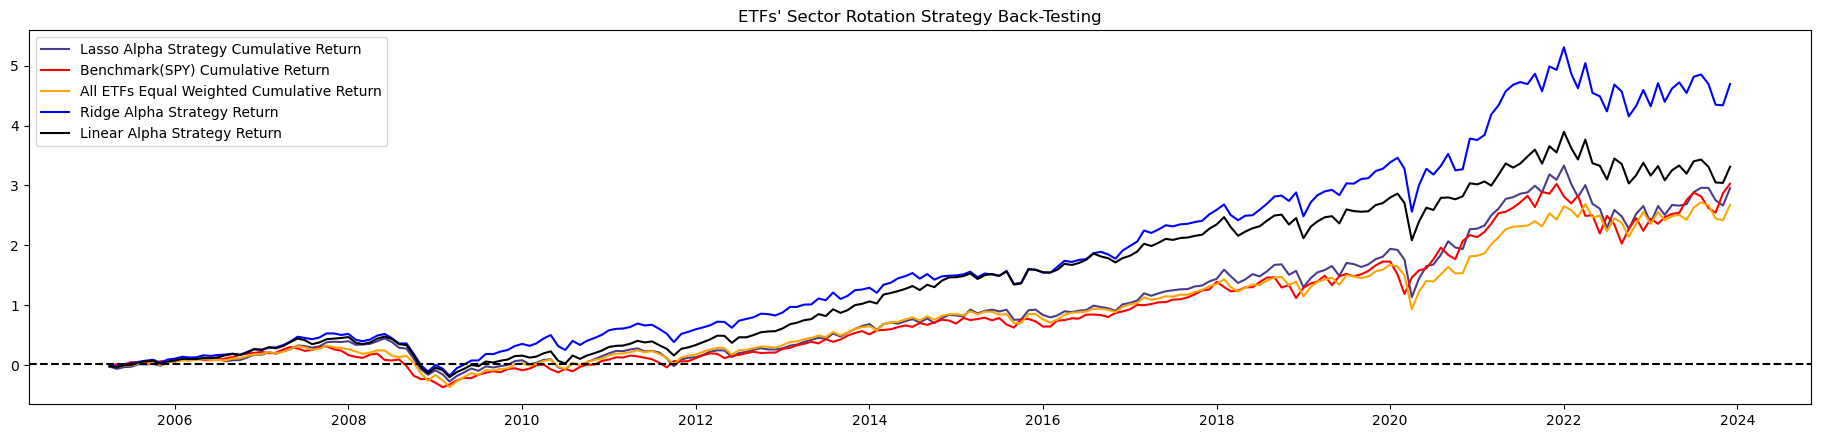

In [7]:
plt.subplots(figsize=(23, 10))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=3, colspan=1)
ax1.set_title("ETFs' Sector Rotation Strategy Back-Testing")

ax1.plot(df_backtesting.index, (1 + df_backtesting['Lasso Alpha Strategy Return']).cumprod() - 1, label='Lasso Alpha Strategy Cumulative Return', color='darkslateblue')
ax1.plot(df_backtesting.index, (1 + df_backtesting['Benchmark Return']).cumprod() - 1, label='Benchmark(SPY) Cumulative Return', color='red')
ax1.plot(df_backtesting.index, (1 + df_backtesting['All ETFs Equal Weighted Return']).cumprod() - 1, label='All ETFs Equal Weighted Cumulative Return', color='orange')
ax1.plot(df_backtesting.index, (1 + df_backtesting['Ridge Alpha Strategy Return']).cumprod() - 1, label='Ridge Alpha Strategy Return', color='blue')
ax1.plot(df_backtesting.index, (1 + df_backtesting['Linear Alpha Strategy Return']).cumprod() - 1, label='Linear Alpha Strategy Return', color='black')

ax1.axhline(0.01, linestyle='--', color='black')
ax1.legend(loc='upper left')

plt.show()

In [8]:
drop_columns = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

df_alpha_strategies = df_backtesting.drop(columns=drop_columns)
df_alpha_strategies

,Ridge Alpha Strategy Return,Lasso Alpha Strategy Return,Linear Alpha Strategy Return,All ETFs Equal Weighted Return,Benchmark Return
DATE,,,,,
2005-04-01,-0.014078,-0.027407,-0.025014,-0.024147,-0.018735
2005-05-01,-0.008480,-0.038584,-0.015440,-0.013234,0.032225
2005-06-01,0.025845,0.031284,0.037701,0.031044,-0.002511
2005-07-01,0.021904,0.005511,0.002179,-0.002159,0.038261
2005-08-01,0.026759,0.044618,0.044021,0.035470,-0.009374
...,...,...,...,...,...
2023-08-01,0.006493,0.018684,0.006493,0.025091,-0.016252
2023-09-01,-0.027073,-0.000349,-0.027073,-0.014821,-0.050783
2023-10-01,-0.060901,-0.052268,-0.060901,-0.059046,-0.021709


In [9]:
# Calculate cumulative returns
cumulative_returns = (1 + df_alpha_strategies).cumprod() - 1

# Calculate annualized returns
annualized_returns = ((1 + cumulative_returns.iloc[-1]) ** (1 / len(cumulative_returns.index.year.unique()))) - 1

# Calculate total cumulative return
total_cumulative_return = cumulative_returns.iloc[-1]

# Calculate standard deviation (volatility)
volatility = np.round(np.std(df_alpha_strategies) * np.sqrt(12),decimals=2)

# Calculate Sharpe ratio (assuming a risk-free rate of 0)
sharpe_ratio = (annualized_returns / volatility)

# Calculate drawdown
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / (1 + running_max)

# Convert to percentages
annualized_returns *= 100
total_cumulative_return *= 100
volatility *= 100

# Display principal ratios as a table
principal_ratios_table = pd.DataFrame({
    'Annualized Returns (%)': round(annualized_returns, 2),
    'Total Cumulative Return (%)': round(total_cumulative_return, 2),
    'Volatility (Standard Deviation) (%)': volatility,
    'Sharpe Ratio': round(sharpe_ratio, 2),
    'Maximum Drawdown (%)': round(drawdown.min()*100, 2)
})

# Display the table
display(principal_ratios_table)

,Annualized Returns (%),Total Cumulative Return (%),Volatility (Standard Deviation) (%),Sharpe Ratio,Maximum Drawdown (%)
Ridge Alpha Strategy Return,9.59,469.62,16.0,0.60,-46.35
Lasso Alpha Strategy Return,7.50,295.47,18.0,0.42,-49.90
Linear Alpha Strategy Return,8.00,331.24,16.0,0.50,-45.93
All ETFs Equal Weighted Return,7.09,267.71,17.0,0.42,-52.36
Benchmark Return,7.61,302.94,15.0,0.51,-52.20
